In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(X_train , Y_train) , (X_test , Y_test) = keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
Y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
Y_test.shape


(10000, 1)

In [7]:
Y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
Y_train = Y_train.reshape(-1,)

In [9]:
Y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [10]:
classes = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

<Figure size 1500x200 with 0 Axes>

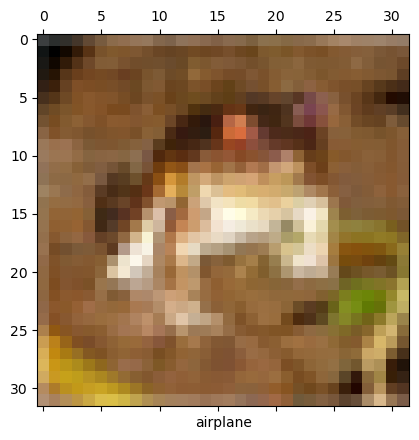

<Figure size 1500x200 with 0 Axes>

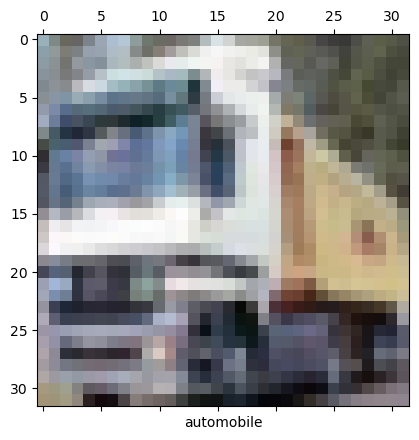

<Figure size 1500x200 with 0 Axes>

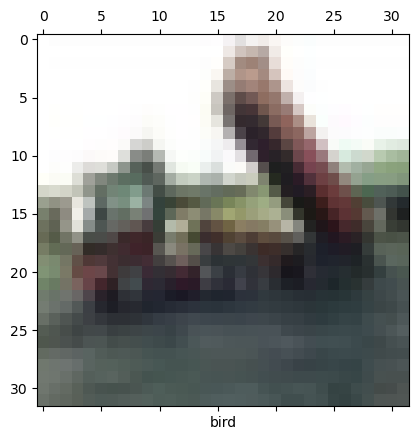

<Figure size 1500x200 with 0 Axes>

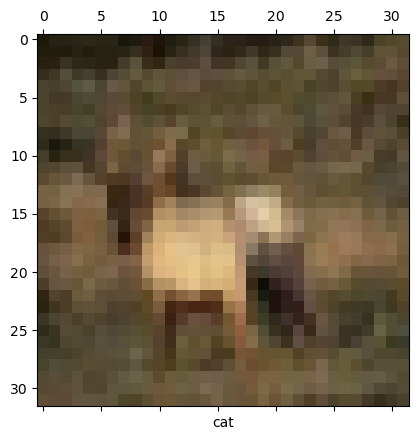

<Figure size 1500x200 with 0 Axes>

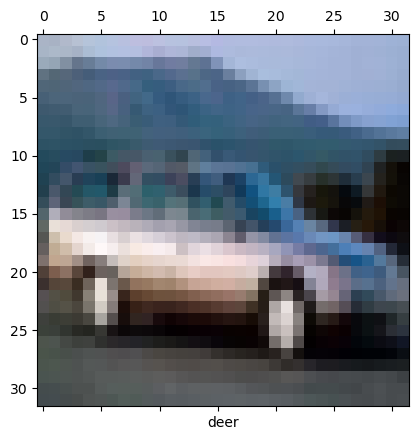

In [11]:
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.matshow(X_train[i])
    plt.xlabel(classes[i])

In [12]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
Y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [15]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000 , activation = 'relu'),
    keras.layers.Dense(1000 , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'softmax')
    
])

ann.compile(optimizer = 'SGD' , loss = 'sparse_categorical_crossentropy' , metrics = 'accuracy' )

ann.fit(X_train , Y_train , epochs = 8)
  




Epoch 1/8


1563/1563 [==============================] - 115s 72ms/step - loss: 1.8169 - accuracy: 0.3535
Epoch 2/8
1563/1563 [==============================] - 110s 71ms/step - loss: 1.6248 - accuracy: 0.4279
Epoch 3/8
1563/1563 [==============================] - 109s 70ms/step - loss: 1.5437 - accuracy: 0.4564
Epoch 4/8
1563/1563 [==============================] - 107s 69ms/step - loss: 1.4842 - accuracy: 0.4747
Epoch 5/8
1563/1563 [==============================] - 107s 69ms/step - loss: 1.4358 - accuracy: 0.4952
Epoch 6/8
1563/1563 [==============================] - 108s 69ms/step - loss: 1.3904 - accuracy: 0.5117
Epoch 7/8
1563/1563 [==============================] - 107s 68ms/step - loss: 1.3525 - accuracy: 0.5250
Epoch 8/8
1563/1563 [==============================] - 107s 69ms/step - loss: 1.3169 - accuracy: 0.5379


In [18]:
ann.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.4307 - accuracy: 0.4985


[1.4306895732879639, 0.4984999895095825]

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(X_test)
y_pred[:5]


313/313 [==============================] - 3s 9ms/step


array([[2.4501709e-02, 9.9372111e-02, 9.1280721e-02, 3.9848095e-01,
        3.2840017e-02, 1.4329217e-01, 1.5522650e-01, 1.9250837e-03,
        4.5450620e-02, 7.6301615e-03],
       [3.2010037e-02, 1.9837297e-01, 7.4066943e-04, 2.4769509e-03,
        7.7688729e-04, 4.1263594e-04, 2.3136298e-04, 3.7292173e-04,
        2.7720252e-01, 4.8740298e-01],
       [2.7569973e-01, 2.1709202e-01, 1.2289763e-03, 1.7093510e-03,
        1.2401182e-03, 8.2780194e-04, 5.3240059e-05, 2.9947492e-03,
        2.7156866e-01, 2.2758539e-01],
       [2.4946579e-01, 1.2879719e-01, 1.6475642e-02, 1.6395394e-02,
        4.5581076e-02, 6.4488500e-03, 6.5800635e-04, 9.1476835e-02,
        3.6837986e-01, 7.6321296e-02],
       [5.1721358e-03, 4.3814043e-03, 3.6403652e-02, 3.3434965e-02,
        5.9882474e-01, 3.4501776e-02, 2.6671499e-01, 9.0670809e-03,
        8.7903673e-03, 2.7088539e-03]], dtype=float32)

In [22]:
y_pred_classes = [np.argmax(k) for k in y_pred]

In [23]:
y_pred_classes

[3,
 9,
 0,
 8,
 4,
 6,
 1,
 6,
 5,
 1,
 8,
 9,
 1,
 7,
 1,
 8,
 5,
 9,
 8,
 6,
 1,
 0,
 0,
 9,
 4,
 6,
 6,
 7,
 9,
 6,
 6,
 4,
 4,
 5,
 9,
 1,
 6,
 9,
 1,
 5,
 0,
 6,
 7,
 6,
 9,
 9,
 3,
 9,
 4,
 6,
 9,
 8,
 6,
 3,
 8,
 8,
 5,
 9,
 9,
 4,
 7,
 3,
 1,
 9,
 6,
 2,
 1,
 0,
 3,
 9,
 4,
 6,
 8,
 8,
 0,
 6,
 9,
 3,
 3,
 8,
 8,
 1,
 1,
 0,
 0,
 7,
 9,
 9,
 8,
 9,
 9,
 4,
 8,
 6,
 4,
 5,
 6,
 0,
 0,
 7,
 7,
 7,
 6,
 3,
 1,
 1,
 5,
 6,
 1,
 7,
 4,
 0,
 6,
 4,
 9,
 1,
 0,
 9,
 2,
 5,
 8,
 4,
 1,
 2,
 8,
 1,
 8,
 3,
 4,
 9,
 4,
 1,
 9,
 9,
 1,
 3,
 9,
 7,
 6,
 8,
 6,
 1,
 1,
 5,
 9,
 7,
 6,
 5,
 5,
 3,
 1,
 9,
 8,
 8,
 0,
 5,
 6,
 9,
 3,
 9,
 0,
 1,
 5,
 6,
 9,
 7,
 8,
 6,
 7,
 0,
 9,
 7,
 1,
 8,
 9,
 9,
 8,
 7,
 3,
 9,
 9,
 7,
 6,
 8,
 7,
 8,
 6,
 6,
 7,
 0,
 6,
 9,
 5,
 1,
 7,
 4,
 8,
 0,
 7,
 8,
 7,
 9,
 8,
 7,
 1,
 6,
 0,
 4,
 7,
 8,
 6,
 1,
 1,
 7,
 9,
 0,
 1,
 9,
 0,
 7,
 7,
 6,
 9,
 6,
 9,
 9,
 9,
 6,
 7,
 1,
 5,
 1,
 9,
 1,
 8,
 0,
 4,
 0,
 6,
 5,
 1,
 1,
 7,
 9,
 0,
 9,
 7,
 0,
 5,
 1,


In [24]:
Y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [25]:
y_pred_classes[:5]

[3, 9, 0, 8, 4]

In [26]:
print(classification_report(Y_test , y_pred_classes))

              precision    recall  f1-score   support

           0       0.57      0.54      0.56      1000
           1       0.52      0.72      0.60      1000
           2       0.53      0.12      0.20      1000
           3       0.42      0.22      0.29      1000
           4       0.47      0.40      0.43      1000
           5       0.46      0.37      0.41      1000
           6       0.49      0.67      0.56      1000
           7       0.49      0.64      0.56      1000
           8       0.64      0.62      0.63      1000
           9       0.42      0.67      0.52      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.48     10000
weighted avg       0.50      0.50      0.48     10000



In [29]:
# CNN

cnn = keras.Sequential([
    keras.layers.Conv2D(filters=96 , kernel_size = (3,3) , activation = 'relu' ,  input_shape = (32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64 , kernel_size = (3,3) , activation = 'relu' ,  input_shape = (32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=32 , kernel_size = (3,3) , activation = 'relu' ,  input_shape = (32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    #dense
    
    keras.layers.Flatten(),
    keras.layers.Dense(100 , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'softmax')
    
])

cnn.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
cnn.fit(X_train , Y_train , epochs = 8)

Epoch 1/8
1563/1563 [==============================] - 35s 21ms/step - loss: 1.6131 - accuracy: 0.4063
Epoch 2/8
1563/1563 [==============================] - 32s 21ms/step - loss: 1.2796 - accuracy: 0.5384
Epoch 3/8
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1409 - accuracy: 0.5930
Epoch 4/8
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0619 - accuracy: 0.6213
Epoch 5/8
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9879 - accuracy: 0.6470
Epoch 6/8
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9409 - accuracy: 0.6652
Epoch 7/8
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8998 - accuracy: 0.6807
Epoch 8/8
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8677 - accuracy: 0.6925


In [30]:
cnn.evaluate(X_test,  Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9619 - accuracy: 0.6659


[0.9619268774986267, 0.6658999919891357]

In [31]:
Y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [33]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[6.53389143e-03, 7.57312169e-04, 1.48598785e-02, 5.88065147e-01,
        2.95477570e-03, 3.14433962e-01, 2.90991757e-02, 1.54672675e-02,
        2.19191480e-02, 5.90944150e-03],
       [2.30264384e-03, 2.81249434e-01, 1.69376347e-06, 1.11906356e-05,
        8.27519727e-07, 6.00486942e-07, 1.56449758e-07, 2.63342997e-07,
        7.16081619e-01, 3.51546681e-04],
       [1.24800377e-01, 6.77185580e-02, 4.42435965e-03, 9.81318392e-03,
        3.03711835e-03, 4.87601291e-03, 3.72307212e-03, 3.70909669e-03,
        6.27338946e-01, 1.50559247e-01],
       [7.45779872e-01, 6.82295412e-02, 4.39989753e-02, 7.07272533e-03,
        8.68229568e-02, 4.00649477e-03, 8.69041658e-04, 2.49199127e-03,
        3.86960804e-02, 2.03243643e-03],
       [2.37785061e-04, 4.51800181e-04, 8.20354298e-02, 4.32261303e-02,
        6.42136037e-01, 2.68640406e-02, 2.02784851e-01, 2.15914776e-03,
        6.02691543e-05, 4.45169280e-05]], dtype=float32)

In [35]:
y_pred_classes = [np.argmax(j) for j in y_pred]

In [36]:
y_pred_classes[:5]

[3, 8, 8, 0, 4]

In [37]:
Y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [38]:
y_pred_classes[:10]

[3, 8, 8, 0, 4, 6, 1, 4, 3, 1]

In [40]:
Y_test = Y_test.reshape(-1,)

In [41]:
Y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [43]:
plt

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

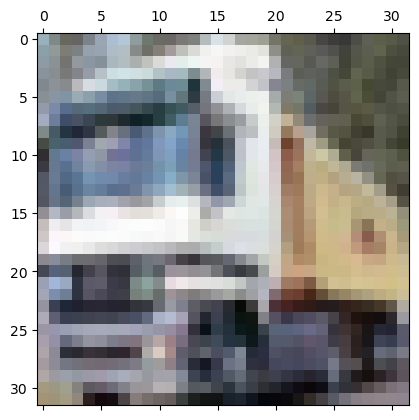

In [44]:
plt.matshow(X_train[1])

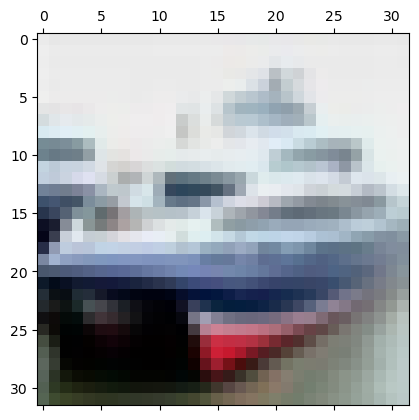

In [45]:
plt.matshow(X_test[1])

ValueError: not enough values to unpack (expected 2, got 0)